In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("baseball.csv")
print(df.shape)
df.head()

(30, 17)


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


To find presence of null values by graphical method

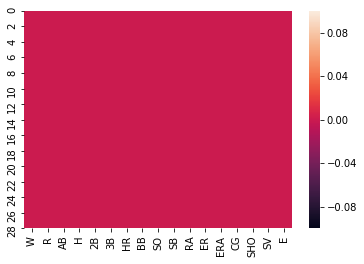

In [4]:
sns.heatmap(df.isnull())

There is no null values

In [5]:
df.apply(lambda a:len(a.unique()))

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

To find which features affect the wins by useing correlation

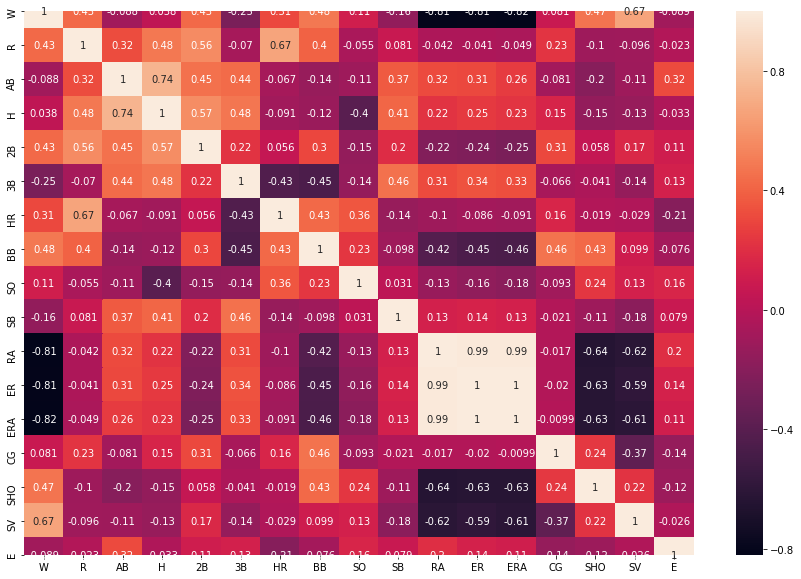

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [7]:
df.corr()["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

wins is highly positive correlated with (SV>BB>SHO)

wins is highly negative correlated with (ERA>RA>ER)

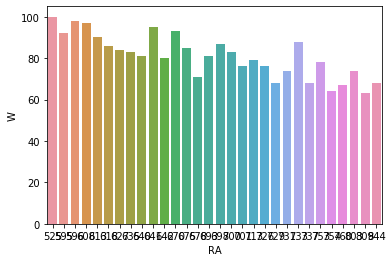

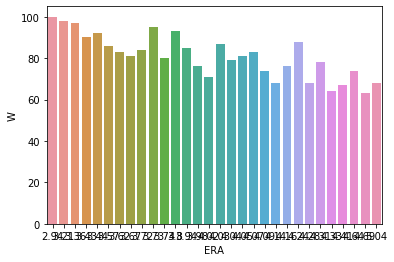

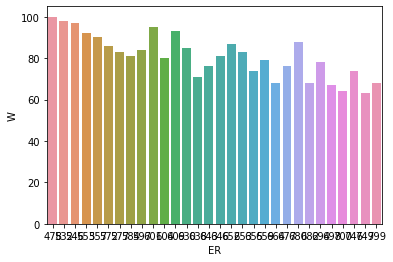

In [8]:
#to know relation ship between negative correlated values and w
sns.barplot(x="RA",y="W",data=df)
plt.show()
sns.barplot(x="ERA",y="W",data=df)
plt.show()
sns.barplot(x="ER",y="W",data=df)
plt.show()

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


to find outliers which present in data

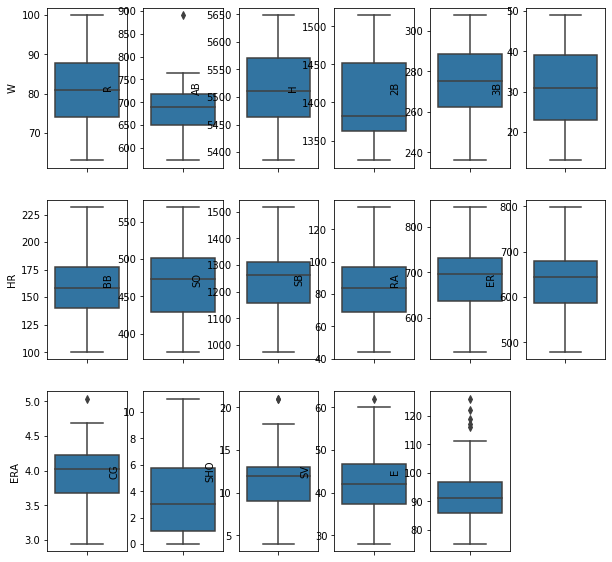

In [10]:
col=df.columns
plt.figure(figsize=(10,10))
for i in range(len(col)):
    plt.subplot(3,6,i+1)
    sns.boxplot(df[col[i]],orient="v")

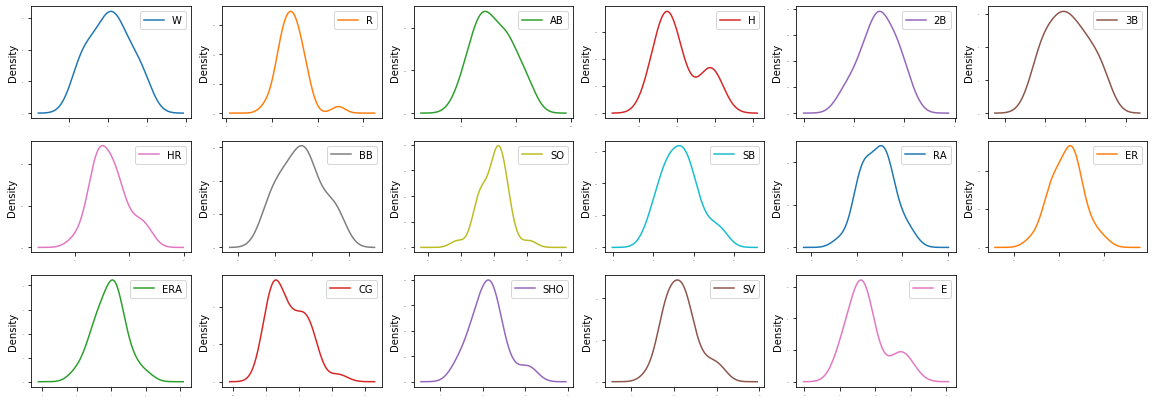

In [11]:
df.plot(kind="density",subplots=True,layout=(3,6),sharex=False,fontsize=1,figsize=(20,7))
plt.show()

In [12]:
df.skew().sort_values(ascending=False)

R      1.200786
E      0.890132
CG     0.736845
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
W      0.047089
RA     0.045734
SO    -0.156065
2B    -0.230650
dtype: float64

there is presence of skewness in 6 columns (greater than 0.55) we have to trear it

To remove skewness

In [13]:
list1=["R","E","CG","H","SV","SHO"]
for i in list1:
    df[i]=np.sqrt(df[i])

In [14]:
df.skew().sort_values(ascending=False)

R      0.968676
E      0.763487
H      0.649567
HR     0.516441
SB     0.479893
SV     0.410288
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
W      0.047089
RA     0.045734
SHO   -0.061761
SO    -0.156065
2B    -0.230650
CG    -0.311476
dtype: float64

still there is presence of skewness in R,E,H columns

In [15]:
for col in df.columns:
    if df.skew().loc[col]>.55:
        df[col]=np.log(df[col])
df.skew().sort_values(ascending=False)

R      0.744196
E      0.630080
H      0.628554
HR     0.516441
SB     0.479893
SV     0.410288
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
W      0.047089
RA     0.045734
SHO   -0.061761
SO    -0.156065
2B    -0.230650
CG    -0.311476
dtype: float64

after apply log and sqrt transformation there is stil presence of skewness in R,E,H

In [16]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print("Before removel of outlier",df.shape)
print("After removel of outlier",df1.shape)

Before removel of outlier (30, 17)
After removel of outlier (29, 17)


In [17]:
df1.skew().sort_values(ascending=False)

H      0.738423
E      0.583308
SB     0.494966
HR     0.450862
SV     0.370280
AB     0.169573
BB     0.151193
W      0.119013
3B     0.090124
ER     0.018461
RA     0.018155
ERA    0.016693
SHO   -0.085802
SO    -0.233815
CG    -0.260678
2B    -0.335304
R     -0.388698
dtype: float64

there is presense of less amount of outliers

after removel of outliers amount of skewness in R get reduced

seperate the train data and test data

In [18]:
x=df1.drop(["W"],axis=1)
y=df1["W"]
print(x.shape)
print(y.shape)

(29, 16)
(29,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [20]:
macc=0
rand=0
for i in range(200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    acc=r2_score(ytest,pred)
    if acc>macc:
        macc=acc
        rand=i
print( "for Random state : ",rand,"Acc_score : ",macc)

for Random state :  160 Acc_score :  0.9304135357281731


In [21]:
print("MSE : ",mean_squared_error(ytest,pred))
print("MAE : ",mean_absolute_error(ytest,pred))

MSE :  31.03619083241455
MAE :  5.37261348682793


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [57]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),AdaBoostRegressor(),RandomForestRegressor()]
m_acc=0
for i in range(90):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.33,random_state=i)
    for m in model:
        m.fit(xtrain,ytrain)
        pred=m.predict(xtest)
        score=r2_score(ytest,pred)
        if score>m_acc:
            m_acc=score
            rand=i
            mod=m
print("for random_state ",rand," r2_score is ",m_acc," in the model ",mod)

for random_state  39  r2_score is  0.7950271739130437  in the model  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [58]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),AdaBoostRegressor(),RandomForestRegressor()]
for i in model:
    cvs=cross_val_score(i,x,y,cv=4)
    print(i,cvs.mean())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) -0.5080315031866842
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 0.005551492734213903
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') 0.054535106668208794
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) -0.2062052243238509
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) 0.59270

Hyper Parameter Tuneing

In [65]:
from sklearn.model_selection import GridSearchCV
para={"copy_X":["True","False"], "fit_intercept":["True","False"]}

In [66]:
gv=GridSearchCV(lr,para,cv=4)
gv.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
gv.best_params_

{'copy_X': 'True', 'fit_intercept': 'True'}

In [68]:
gvpred=gv.predict(xtest)

In [69]:
r2_score(ytest,gvpred)

-3.457039088361932

In [70]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,3.292396,5575,3.655609,300,42,139,383,973,104,641,601,3.73,1.414214,2.828427,7.483315,2.238668
1,83,3.272675,5467,3.603559,277,44,156,439,1264,70,700,653,4.07,1.414214,3.464102,6.708204,2.227174
2,81,3.252892,5439,3.620325,303,29,141,533,1157,86,640,584,3.67,3.316625,3.162278,6.164414,2.184724
3,76,3.216470,5533,3.615282,260,27,136,404,1231,68,701,643,3.98,2.645751,3.000000,6.082763,2.307560
4,74,3.267621,5605,3.661585,289,49,151,455,1259,83,803,746,4.64,2.645751,3.464102,5.916080,2.227174


LinearRegression have high accuracy

In [71]:
import joblib
joblib.dump(lr,"baseball.obj")
v=joblib.load("baseball.obj")

In [72]:
pred=v.predict(xtest)
r2_score(ytest,pred)

0.9086866521404041

In [73]:
l=np.array([3.2,5575,3.65,300,42,139,383,973,104,641,601,3.73,1.4,2.8,7.4,2.2])
l=l.reshape(1,-1)

In [74]:
v.predict(l)

array([73.1306294])